In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import chardet

In [2]:

data = pd.read_excel('./oasis_cross-sectional.xlsx')


In [3]:
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


- M/F = Gender

- Hand = Handedness

- Educ = Education  (Education codes correspond to the following levels of education: 1: less than high school grad., 2:
high school grad., 3: some college, 4: college grad., 5: beyond college.)

- SES = Socioeconomic status

- MMSE = Mini-mental state examination

- CDR = Clinical dementia rating (0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia (Morris, 1993). All participants with dementia (CDR >0) were diagnosed with probable AD.)

- eTIV = Estimated total intracranial volume 

- nWBV = Normalized whole brain volume

- ASF = Atlas scaling factor


In [4]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [5]:
#Dropping NaN values so they don't mess with the statistical analysis
cleaned_data = data.dropna(subset=['Educ', 'SES', 'MMSE', 'CDR'], inplace=False)

In [6]:
#Comparing with the non-cleaned dataframe
cleaned_data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,0.0
mean,72.444444,3.231481,2.490741,27.324074,0.261574,1458.638889,0.750500,1.217176,NaN
std,12.306424,1.333689,1.120593,3.436680,0.382593,160.523125,0.048271,0.128858,NaN
min,33.000000,1.000000,1.000000,15.000000,0.000000,1123.000000,0.644000,0.881000,NaN
25%,66.000000,2.000000,2.000000,26.000000,0.000000,1346.000000,0.715000,1.141750,NaN
50%,73.000000,3.000000,2.000000,29.000000,0.000000,1445.500000,0.748500,1.214500,NaN
75%,81.000000,4.000000,3.000000,30.000000,0.500000,1536.500000,0.786000,1.304000,NaN
max,96.000000,5.000000,5.000000,30.000000,2.000000,1992.000000,0.841000,1.563000,NaN


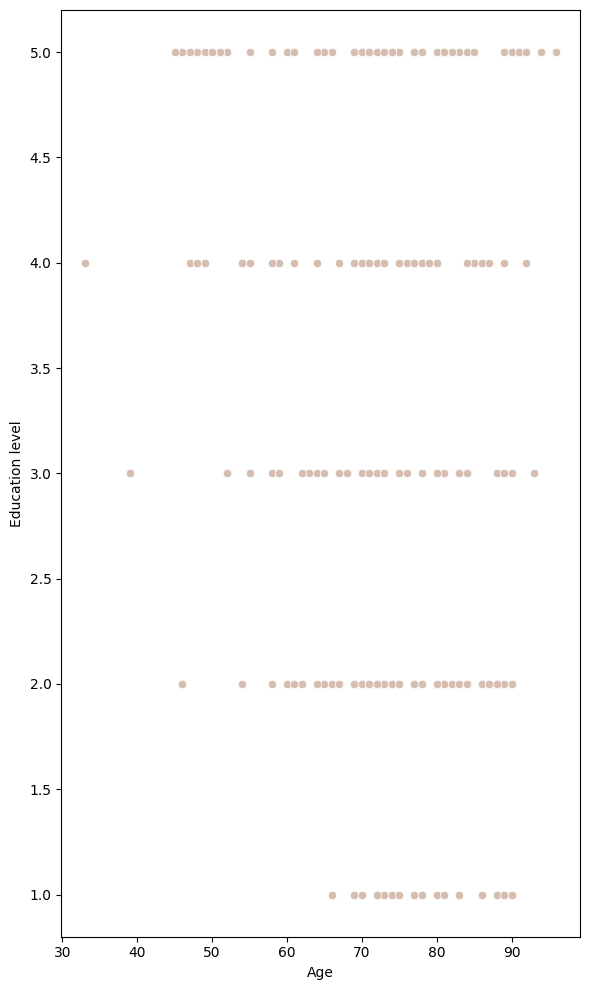

In [7]:
fig = plt.figure(figsize=(6, 10))
sns.scatterplot(data=cleaned_data, x='Age', y='Educ', color='#d5bdaf')
plt.xlabel('Age')
plt.ylabel('Education level')
plt.tight_layout()
plt.show()


Here, we can see that the older the people, the lower their education is.
We can also visualize some outliers, on age 40, education level 3, age between 30-40, education level 4 and age between 40-50, education level 2. 

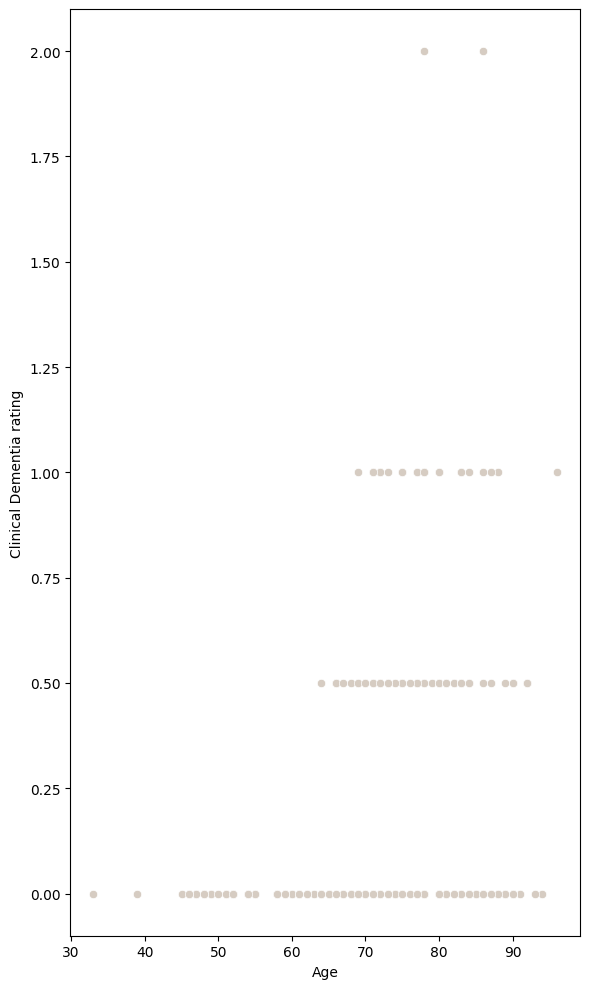

In [8]:
fig = plt.figure(figsize=(6, 10))
sns.scatterplot(data=cleaned_data, x='Age', y='CDR', color='#d6ccc2')
plt.xlabel('Age')
plt.ylabel('Clinical Dementia rating')
plt.tight_layout()
plt.show()

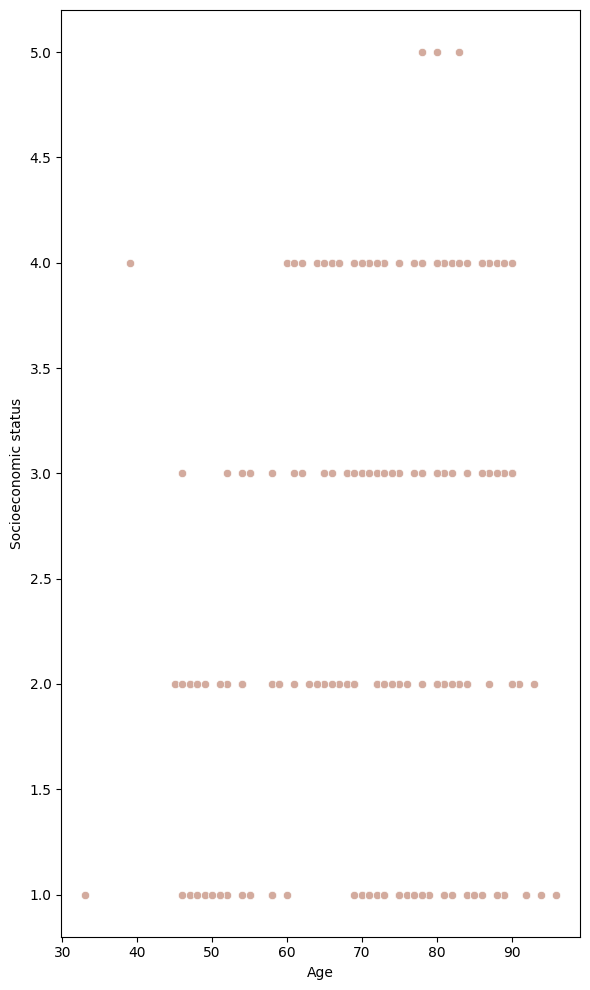

In [9]:
fig = plt.figure(figsize=(6, 10))
sns.scatterplot(data=cleaned_data, x='Age', y='SES', color='#d3ab9e')
plt.xlabel('Age')
plt.ylabel('Socioeconomic status')
plt.tight_layout()
plt.show()

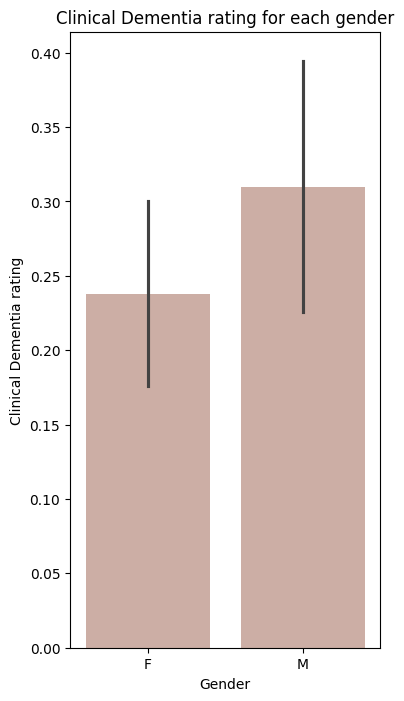

In [10]:
fig = plt.figure(figsize=(4, 8))
sns.barplot(data=cleaned_data, x='M/F', y='CDR', color='#d3ab9e')
plt.title('Clinical Dementia rating for each gender')
plt.xlabel('Gender')
plt.ylabel('Clinical Dementia rating')
plt.show()

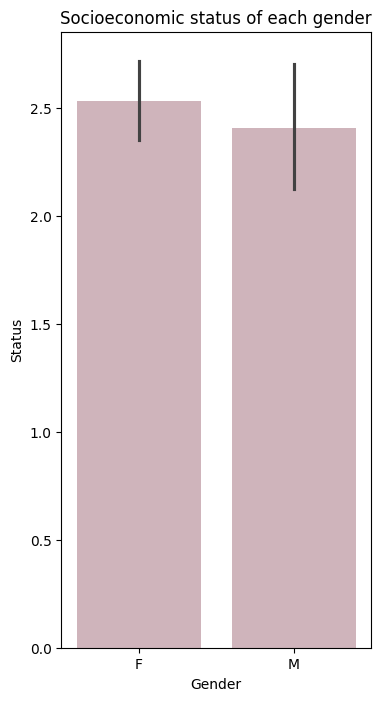

In [11]:
fig = plt.figure(figsize=(4, 8))
sns.barplot(data=cleaned_data, x='M/F', y='SES', color='#d4afb9')
plt.title('Socioeconomic status of each gender')
plt.xlabel('Gender')
plt.ylabel('Status')
plt.show()

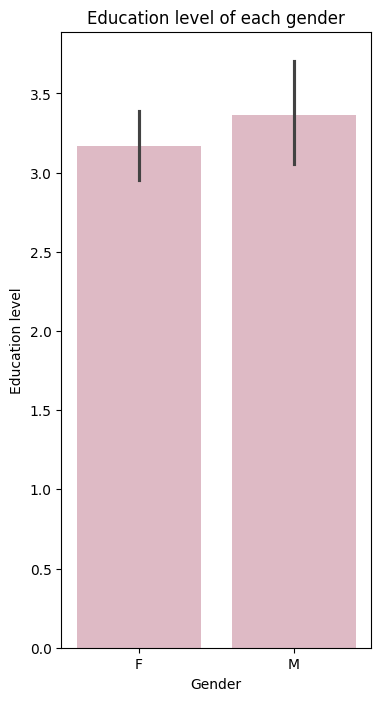

In [12]:
fig = plt.figure(figsize=(4, 8))
sns.barplot(data=cleaned_data, x='M/F', y='Educ', color='#e4b4c2')
plt.title('Education level of each gender')
plt.xlabel('Gender')
plt.ylabel('Education level')
plt.show()

In [13]:
handedness = 0

In [14]:
for index, row in cleaned_data.iterrows():
    if row['Hand'] == 'R':
        handedness += 1

print('Amount of right handed individuals: ', handedness)

Amount of right handed individuals:  216


In [15]:
handedness_count = cleaned_data['Hand'].value_counts()

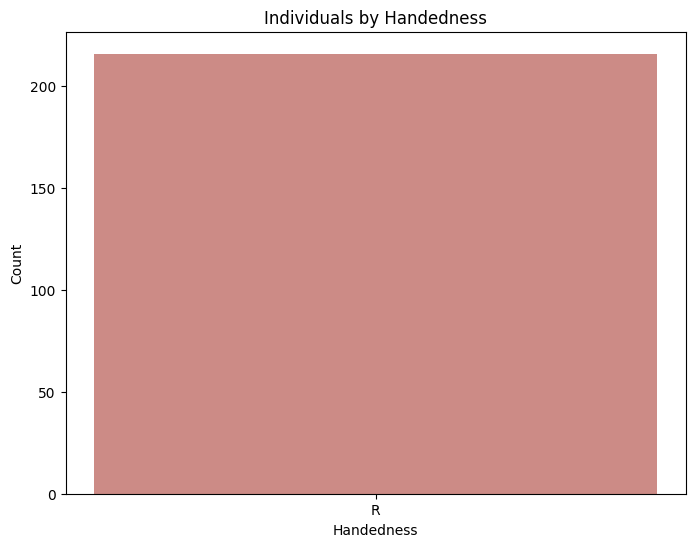

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(handedness_count.index, handedness_count.values, color='#cc8b86')
plt.xlabel('Handedness')
plt.ylabel('Count')
plt.title('Individuals by Handedness')
plt.show()

We can see, that there are not left handed individials.